[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_23120/2342823887.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['Short_MA'][20:] > data['Long_MA'][20:], 1, 0)


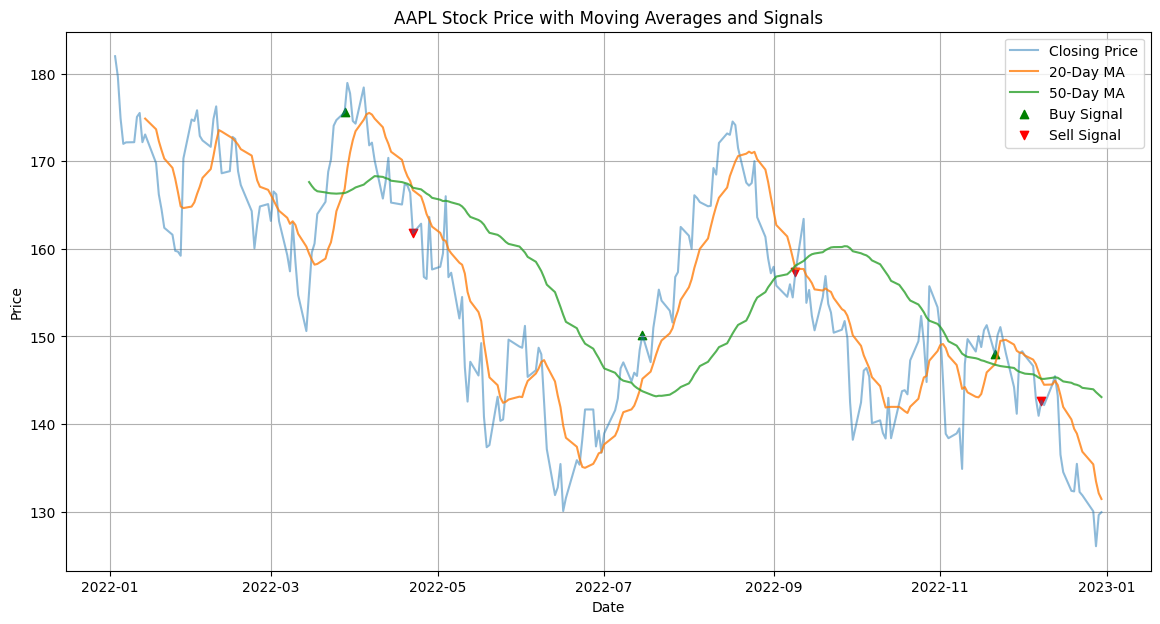

,Open,High,Low,Close,Adj Close,Volume,Short_MA,Long_MA,Signal,Position
Date,,,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953888,104487900,NaN,NaN,0,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669968,99310400,NaN,NaN,0,0.0
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600,NaN,NaN,0,0.0
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056961,96904000,NaN,NaN,0,0.0
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900,136.839000,144.131800,0,0.0
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800,135.392999,143.964799,0,0.0
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400,133.449999,143.637399,0,0.0


In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock and time period
stock = 'AAPL'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical data
data = yf.download(stock, start=start_date, end=end_date)

# Calculate moving averages
data['Short_MA'] = data['Close'].rolling(window=10).mean()
data['Long_MA'] = data['Close'].rolling(window=50).mean()

# Define the strategy
data['Signal'] = 0
data['Signal'][20:] = np.where(data['Short_MA'][20:] > data['Long_MA'][20:], 1, 0)
data['Position'] = data['Signal'].diff()

# Prepare the plot
plt.figure(figsize=(14, 7))

# Plot the closing price, short-term and long-term moving averages
plt.plot(data['Close'], label='Closing Price', alpha=0.5)
plt.plot(data['Short_MA'], label='20-Day MA', alpha=0.8)
plt.plot(data['Long_MA'], label='50-Day MA', alpha=0.8)

# Highlight buy signals
buy_signals = data[data['Position'] == 1]
plt.scatter(buy_signals.index, data.loc[buy_signals.index]['Close'], marker='^', color='g', label='Buy Signal', alpha=1)

# Highlight sell signals
sell_signals = data[data['Position'] == -1]
plt.scatter(sell_signals.index, data.loc[sell_signals.index]['Close'], marker='v', color='r', label='Sell Signal', alpha=1)

# Customize the plot
plt.title(f'{stock} Stock Price with Moving Averages and Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()
data


In [20]:
# Backtesting the strategy
initial_cash = 10000  # starting capital
cash = initial_cash
stock_owned = 0
stock_value = 0

for date, col in data.iterrows():
    if col['Position'] == 1:  # buy signal
        if cash > 0:
            stock_owned = cash / row['Close']
            cash = 0
    elif col['Position'] == -1:  # sell signal
        if stock_owned > 0:
            cash = stock_owned * row['Close']
            stock_owned = 0
    stock_value = stock_owned * row['Close']

# Calculate final portfolio value
final_value = cash + stock_value
print(f"Initial Cash: ${initial_cash}")
print(f"Final Portfolio Value: ${final_value}")
print(f"Net Profit/Loss: ${final_value - initial_cash}")

Initial Cash: $10000
Final Portfolio Value: $7861.756632465326
Net Profit/Loss: $-2138.243367534674


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

# List of stock tickers
stocks = ['AAPL', 'BABA', 'VOW.DE', 'OR.PA', 'AZN', '0700.HK', 'SIE.DE', 'SAN', 'ULVR.L', '1810.HK']

# Initial total capital and allocation per stock
total_initial_capital = 100000  # e.g., $100,000
initial_capital_per_stock = total_initial_capital / len(stocks)

# Function to backtest a single stock
def backtest_stock(stock, initial_capital):
    data = yf.download(stock, start='2022-01-01', end='2022-12-31')
    data['Short_MA'] = data['Close'].rolling(window=20).mean()
    data['Long_MA'] = data['Close'].rolling(window=50).mean()
    data['Signal'] = 0
    data['Signal'][20:] = np.where(data['Short_MA'][20:] > data['Long_MA'][20:], 1, 0)
    data['Position'] = data['Signal'].diff()

    cash = initial_capital
    stock_owned = 0
    stock_value = 0

    for date, row in data.iterrows():
        if row['Position'] == 1:  # buy signal
            if cash > 0:
                stock_owned = cash / row['Close']
                cash = 0
        elif row['Position'] == -1:  # sell signal
            if stock_owned > 0:
                cash = stock_owned * row['Close']
                stock_owned = 0
        stock_value = stock_owned * row['Close']

    final_value = cash + stock_value
    return final_value

# Backtest each stock and sum up the final values
final_portfolio_value = 0
for stock in stocks:
    final_value = backtest_stock(stock, initial_capital_per_stock)
    final_portfolio_value += final_value

# Output results
print(f"Initial Portfolio Value: ${total_initial_capital}")
print(f"Final Portfolio Value: ${final_portfolio_value}")
print(f"Net Profit/Loss: ${final_portfolio_value - total_initial_capital}")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_3719/3380665561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['Short_MA'][20:] > data['Long_MA'][20:], 1, 0)
/tmp/ipykernel_3719/3380665561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['Short_MA'][20:] > data['Long_MA'][20:], 1, 0)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_3719/3380665561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['Short_MA'][20:] > data['Long_MA'][20:], 1, 0)
/tmp/ipykernel_3719/3380665561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['Short_MA'][20:] > data['Long_MA'][20:], 1, 0)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_3719/3380665561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['Short_MA'][20:] > data['Long_MA'][20:], 1, 0)
/tmp/ipykernel_3719/3380665561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['Short_MA'][20:] > data['Long_MA'][20:], 1, 0)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/tmp/ipykernel_3719/3380665561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['Short_MA'][20:] > data['Long_MA'][20:], 1, 0)
/tmp/ipykernel_3719/3380665561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['Short_MA'][20:] > data['Long_MA'][20:], 1, 0)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Initial Portfolio Value: $100000
Final Portfolio Value: $96397.1262983101
Net Profit/Loss: $-3602.873701689896


/tmp/ipykernel_3719/3380665561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['Short_MA'][20:] > data['Long_MA'][20:], 1, 0)
/tmp/ipykernel_3719/3380665561.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][20:] = np.where(data['Short_MA'][20:] > data['Long_MA'][20:], 1, 0)


### Correlations

In [2]:
import yfinance as yf
import pandas as pd

# List of stock tickers
stocks = ['AAPL', 'BABA', 'VOW.DE', 'OR.PA', 'AZN', '0700.HK', 'SIE.DE', 'SAN', 'ULVR.L', '1810.HK']

# Define the start and end date for fetching data
start_date = '2022-01-01'
end_date = '2022-12-31'

# Create a dataframe to store closing prices
closing_prices = pd.DataFrame()

# Fetch and store the closing prices for each stock
for stock in stocks:
    data = yf.download(stock, start=start_date, end=end_date)
    closing_prices[stock] = data['Close']

# Calculate daily returns
daily_returns = closing_prices.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = daily_returns.corr()

print(correlation_matrix)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
             AAPL      BABA    VOW.DE     OR.PA       AZN   0700.HK    SIE.DE  \
AAPL     1.000000  0.403915  0.353571  0.334727  0.409842  0.088522  0.379805   
BABA     0.403915  1.000000  0.261973  0.293991  0.243252  0.605911  0.318871   
VOW.DE   0.353571  0.261973  1.000000  0.432796  0.265518  0.217905

[*********************100%%**********************]  1 of 1 completed


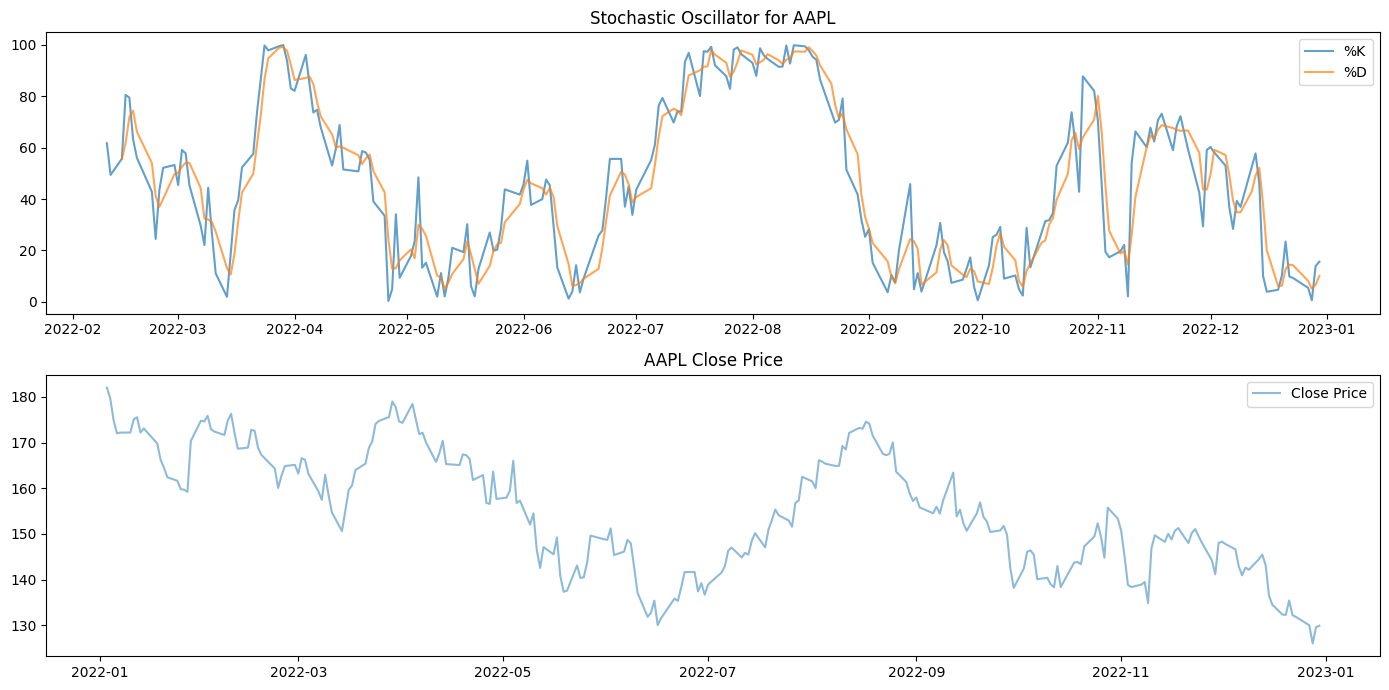

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical data for Apple Inc.
data = yf.download('AAPL', start='2022-01-01', end='2022-12-31')

# Calculate the Stochastic Oscillator
low_min = data['Low'].rolling(window=28).min()
high_max = data['High'].rolling(window=28).max()

data['%K'] = (data['Close'] - low_min) / (high_max - low_min) * 100
data['%D'] = data['%K'].rolling(window=3).mean()

# Plotting
plt.figure(figsize=(14, 7))

# Plotting %K and %D
plt.subplot(2, 1, 1)
plt.plot(data['%K'], label='%K', alpha=0.7)
plt.plot(data['%D'], label='%D', alpha=0.7)
plt.title('Stochastic Oscillator for AAPL')
plt.legend()

# Plotting Close Price for reference
plt.subplot(2, 1, 2)
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.title('AAPL Close Price')
plt.legend()

plt.tight_layout()
plt.show()


In [30]:
from finvizfinance.quote import finvizfinance
from finvizfinance.screener.overview import Overview
import pandas as pd
import csv
import os
from finvizfinance.insider import Insider





stock = finvizfinance('tsla')
stock.ticker_charts()


'https://finviz.com/chart.ashx?t=tsla&ty=c&ta=1&p=d'

In [29]:
stock_fundament = stock.ticker_fundament()
stock_fundament

{'Company': 'Tesla Inc',
 'Sector': 'Consumer Cyclical',
 'Industry': 'Auto Manufacturers',
 'Country': 'USA',
 'Exchange': 'NASD',
 'Index': 'NDX, S&P 500',
 'P/E': '81.53',
 'EPS (ttm)': '3.11',
 'Insider Own': '13.03%',
 'Shs Outstand': '3.16B',
 'Perf Week': '2.44%',
 'Market Cap': '804.84B',
 'Forward P/E': '66.08',
 'EPS next Y': '3.83',
 'Insider Trans': '-0.02%',
 'Shs Float': '2.76B',
 'Perf Month': '2.62%',
 'Income': '10.79B',
 'PEG': '45.80',
 'EPS next Q': '0.73',
 'Inst Own': '43.94%',
 'Short Float / Ratio': '3.00% / 0.69',
 'Perf Quarter': '2.76%',
 'Sales': '95.92B',
 'P/S': '8.39',
 'EPS this Y': '-24.71%',
 'Inst Trans': '1.97%',
 'Short Interest': '82.97M',
 'Perf Half Y': '-1.68%',
 'Book/sh': '16.82',
 'P/B': '15.05',
 'EPS next Y Percentage': '25.04%',
 'ROA': '12.82%',
 'Target Price': '241.00',
 'Perf Year': '132.06%',
 'Cash/sh': '8.35',
 'P/C': '30.34',
 'EPS next 5Y': '1.78%',
 'ROE': '23.13%',
 '52W Range From': '101.81',
 '52W Range To': '299.29',
 'Perf Y

In [32]:
finsider = Insider(option='top owner trade')
# option: latest, top week, top owner trade
# default: latest

insider_trader = finsider.get_insider()
insider_trader

,Ticker,SEC Form 4 Link,Owner,Relationship,Date,Transaction,Cost,#Shares,Value ($),#Shares Total,SEC Form 4
0,PR,http://www.sec.gov/Archives/edgar/data/1658566...,"NGP XI US Holdings, L.P.",10% Owner,Dec 21,Sale,12.93,26276276.0,339752249.0,0.0,Dec 22 04:05 PM
1,OXY,http://www.sec.gov/Archives/edgar/data/315090/...,BERKSHIRE HATHAWAY INC,10% Owner,Dec 20,Buy,60.50,1812508.0,109663984.0,241972680.0,Dec 21 07:20 PM
2,BRK-A,http://www.sec.gov/Archives/edgar/data/315090/...,BERKSHIRE HATHAWAY INC,10% Owner,Dec 20,Buy,60.50,1812508.0,109663984.0,241972680.0,Dec 21 07:20 PM
3,BRK-B,http://www.sec.gov/Archives/edgar/data/315090/...,BERKSHIRE HATHAWAY INC,10% Owner,Dec 20,Buy,60.50,1812508.0,109663984.0,241972680.0,Dec 21 07:20 PM
4,BRK-B,http://www.sec.gov/Archives/edgar/data/315090/...,BERKSHIRE HATHAWAY INC,10% Owner,Dec 21,Buy,60.26,1743124.0,105046056.0,243715804.0,Dec 21 07:20 PM
5,BRK-A,http://www.sec.gov/Archives/edgar/data/315090/...,BERKSHIRE HATHAWAY INC,10% Owner,Dec 21,Buy,60.26,1743124.0,105046056.0,243715804.0,Dec 21 07:20 PM
6,OXY,http://www.sec.gov/Archives/edgar/data/315090/...,BERKSHIRE HATHAWAY INC,10% Owner,Dec 21,Buy,60.26,1743124.0,105046056.0,243715804.0,Dec 21 07:20 PM
7,BRK-A,http://www.sec.gov/Archives/edgar/data/315090/...,BERKSHIRE HATHAWAY INC,10% Owner,Dec 19,Buy,59.85,1626983.0,97382842.0,240160172.0,Dec 21 07:20 PM
8,BRK-B,http://www.sec.gov/Archives/edgar/data/315090/...,BERKSHIRE HATHAWAY INC,10% Owner,Dec 19,Buy,59.85,1626983.0,97382842.0,240160172.0,Dec 21 07:20 PM
9,OXY,http://www.sec.gov/Archives/edgar/data/315090/...,BERKSHIRE HATHAWAY INC,10% Owner,Dec 19,Buy,59.85,1626983.0,97382842.0,240160172.0,Dec 21 07:20 PM


In [33]:
foverview = Overview()
filters_dict = {'Index':'S&P 500','Sector':'Basic Materials'}
foverview.set_filter(filters_dict=filters_dict)
df = foverview.screener_view()
df.head()

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,ALB,Albemarle Corp.,Basic Materials,Specialty Chemicals,USA,1.754000e+10,5.30,149.43,0.0007,1377234.0
1,APD,Air Products & Chemicals Inc.,Basic Materials,Specialty Chemicals,USA,6.094000e+10,26.64,274.23,-0.0053,531832.0
2,CE,Celanese Corp,Basic Materials,Chemicals,USA,1.713000e+10,8.48,157.33,-0.0074,462753.0
3,CF,CF Industries Holdings Inc,Basic Materials,Agricultural Inputs,USA,1.522000e+10,7.41,79.66,-0.0106,794381.0
4,CTVA,Corteva Inc,Basic Materials,Agricultural Inputs,USA,3.389000e+10,36.96,48.09,0.0023,1877361.0


In [ ]:
def get_undervalued_stocks():
    """
    Returns a list of tickers with:
    
    - Positive Operating Margin
    - Debt-to-Equity ratio under 1
    - Low P/B (under 1)
    - Low P/E ratio (under 15)
    - Low PEG ratio (under 1)
    - Positive Insider Transactions
    """
    foverview = Overview()

    filters_dict = {'Debt/Equity':'Under 1', 
                    'PEG':'Low (<1)', 
                    'Operating Margin':'Positive (>0%)', 
                    'P/B':'Low (<1)',
                    'P/E':'Low (<15)',
                    'InsiderTransactions':'Positive (>0%)'}

    parameters = ['Exchange', 'Index', 'Sector', 'Industry', 'Country', 'Market Cap.',
            'P/E', 'Forward P/E', 'PEG', 'P/S', 'P/B', 'Price/Cash', 'Price/Free Cash Flow',
            'EPS growththis year', 'EPS growthnext year', 'EPS growthpast 5 years', 'EPS growthnext 5 years',
            'Sales growthpast 5 years', 'EPS growthqtr over qtr', 'Sales growthqtr over qtr',
            'Dividend Yield', 'Return on Assets', 'Return on Equity', 'Return on Investment',
            'Current Ratio', 'Quick Ratio', 'LT Debt/Equity', 'Debt/Equity', 'Gross Margin',
            'Operating Margin', 'Net Profit Margin', 'Payout Ratio', 'InsiderOwnership', 'InsiderTransactions',
            'InstitutionalOwnership', 'InstitutionalTransactions', 'Float Short', 'Analyst Recom.',
            'Option/Short', 'Earnings Date', 'Performance', 'Performance 2', 'Volatility', 'RSI (14)',
            'Gap', '20-Day Simple Moving Average', '50-Day Simple Moving Average',
            '200-Day Simple Moving Average', 'Change', 'Change from Open', '20-Day High/Low',
            '50-Day High/Low', '52-Week High/Low', 'Pattern', 'Candlestick', 'Beta',
            'Average True Range', 'Average Volume', 'Relative Volume', 'Current Volume',
            'Price', 'Target Price', 'IPO Date', 'Shares Outstanding', 'Float']
    
    foverview.set_filter(filters_dict=filters_dict)
    df_overview = foverview.screener_view()
    
    if not os.path.exists('out'): #ensures you have an 'out' folder ready
        os.makedirs('out')
    df_overview.to_csv('out/Overview.csv', index=False)
    tickers = df_overview['Ticker'].to_list()
    return tickers

#print(get_undervalued_stocks())

foverview = Overview()

filters_dict = {
                'Country':'China',
                'Debt/Equity':'Under 1', 
#                'PEG':'Low (<1)', 
                'Operating Margin':'Positive (>0%)', 
                'P/E':'Low (<15)',
#                'InsiderTransactions':'Positive (>0%)'
                'Market Cap.':'+Large (over $10bln)',
                }

parameters = ['Exchange', 'Index', 'Sector', 'Industry', 'Country', 'Market Cap.',
        'P/E', 'Forward P/E', 'PEG', 'P/S', 'P/B', 'Price/Cash', 'Price/Free Cash Flow',
        'EPS growththis year', 'EPS growthnext year', 'EPS growthpast 5 years', 'EPS growthnext 5 years',
        'Sales growthpast 5 years', 'EPS growthqtr over qtr', 'Sales growthqtr over qtr',
        'Dividend Yield', 'Return on Assets', 'Return on Equity', 'Return on Investment',
        'Current Ratio', 'Quick Ratio', 'LT Debt/Equity', 'Debt/Equity', 'Gross Margin',
        'Operating Margin', 'Net Profit Margin', 'Payout Ratio', 'InsiderOwnership', 'InsiderTransactions',
        'InstitutionalOwnership', 'InstitutionalTransactions', 'Float Short', 'Analyst Recom.',
        'Option/Short', 'Earnings Date', 'Performance', 'Performance 2', 'Volatility', 'RSI (14)',
        'Gap', '20-Day Simple Moving Average', '50-Day Simple Moving Average',
        '200-Day Simple Moving Average', 'Change', 'Change from Open', '20-Day High/Low',
        '50-Day High/Low', '52-Week High/Low', 'Pattern', 'Candlestick', 'Beta',
        'Average True Range', 'Average Volume', 'Relative Volume', 'Current Volume',
        'Price', 'Target Price', 'IPO Date', 'Shares Outstanding', 'Float']

foverview.set_filter(filters_dict=filters_dict)
df_overview = foverview.screener_view()
df_overview